In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
# 3x^3 -5x^2 + 7x + 2

def getData(m):
    X = np.random.rand(m,1)
    noise = np.random.randn(m,1)
    Y = 3*X**5 - X**4 - 12*X**2 + 7*X + 2 + .1*noise
    print(noise.shape)
    Y = Y.reshape((m,))
    return X,Y

In [72]:
#np.random.rand?

In [73]:
X,Y = getData(100)

(100, 1)


In [74]:
print(X.shape)
print(Y.shape)

(100, 1)
(100,)


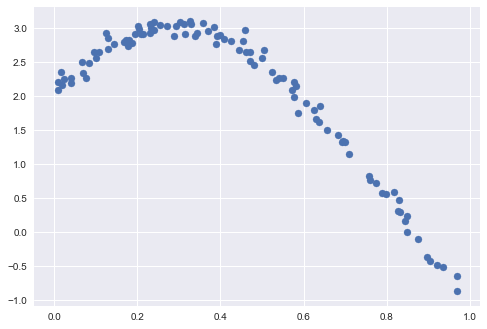

In [76]:
plt.style.use("seaborn")
plt.scatter(X,Y)
plt.show()


In [113]:
def getW(X,q,tau):
    
    #Create W
    m = X.shape[0]
    W = np.eye(m) 
    
    for i in range(m):
        W[i,i] = np.exp(-np.dot((X[i]-q),(X[i]-q).T)/(2*tau*tau))
    
    return W
    
def getTheta(X,Y,q,tau):
    
    m = X.shape[0]
    ones = np.ones((m,1))
    X = np.hstack((ones,X))
    W = getW(X,q,tau)
    Y = Y.reshape((-1,1))
    q = np.array([1,q])
    
    theta = np.dot(np.linalg.pinv(np.dot(np.dot(X.T,W),X)),np.dot(np.dot(X.T,W),Y))
    return theta,W
    
    

In [114]:
theta,W = getTheta(X,Y,0.6,1)

In [115]:
print(theta.shape)
print(W)

(2, 1)
[[0.8318755  0.         0.         ... 0.         0.         0.        ]
 [0.         0.89498979 0.         ... 0.         0.         0.        ]
 [0.         0.         0.86241448 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.82642928 0.         0.        ]
 [0.         0.         0.         ... 0.         0.8985211  0.        ]
 [0.         0.         0.         ... 0.         0.         0.92247711]]


In [124]:
X_Test = np.linspace(0,1,10)
print(X_Test)
Y_Test = []

for xt in X_Test:
    theta,W = getTheta(X,Y,xt,0.1)
    pred = theta[0][0] + theta[1][0]*xt
    Y_Test.append(pred)
    
Y_Test = np.array(Y_Test)
print(Y_Test.shape)
print(Y_Test)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
(10,)
[ 2.14127518  2.58348876  2.86429322  2.88106135  2.6327908   2.1353024
  1.45286971  0.67175675 -0.18345247 -1.05386941]


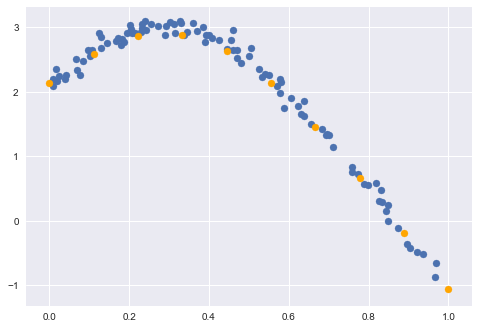

In [125]:
plt.scatter(X,Y)
plt.scatter(X_Test,Y_Test,c='orange')
plt.show()